In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import ast

In [90]:
bechdel_df = pd.read_csv('./data/Bechdel.csv')
movies_df = pd.read_csv('./data/movie.metadata.v1.csv')

bechdel_df.head()

,Unnamed: 0,title,imdbid,id,rating,year
0,0,Passage de Venus,3155794.0,9602,0,1874
1,1,La Rosace Magique,14495706.0,9804,0,1877
2,2,Sallie Gardner at a Gallop,2221420.0,9603,0,1878
3,3,Le singe musicien,12592084.0,9806,0,1878
4,4,Athlete Swinging a Pick,7816420.0,9816,0,1881


In [91]:
import ast

# Function to safely convert string representations of lists into actual lists
def string_to_list(list_string):
    try:
        # This safely evaluates a string as a list
        return ast.literal_eval(list_string)
    except ValueError:
        # In case of error (e.g., empty strings), return an empty list
        return []

movies_df['Languages'] = movies_df['Languages'].apply(string_to_list)
movies_df['Countries'] = movies_df['Countries'].apply(string_to_list)
movies_df['Genres Reduced'] = movies_df['Genres Reduced'].apply(string_to_list)

In [92]:
movies_df.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres Reduced
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Action, Adventure, Horror, Western,..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Thriller, Crime, Drama, Biography]"
2,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime, Fiction, Drama]"
3,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Psychological, Adult]"
4,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [93]:
bechdel_details_df = pd.read_csv('./data/Bechdel_detailed.csv')
bechdel_details_df.head()

,Unnamed: 0,title,year,rating,dubious,imdbid,id,submitterid,date,visible
0,0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0


In [94]:
bechdel_df[bechdel_df['title'] == 'Ghosts of Mars']

,Unnamed: 0,title,imdbid,id,rating,year
3737,3737,Ghosts of Mars,228333.0,333,3,2001


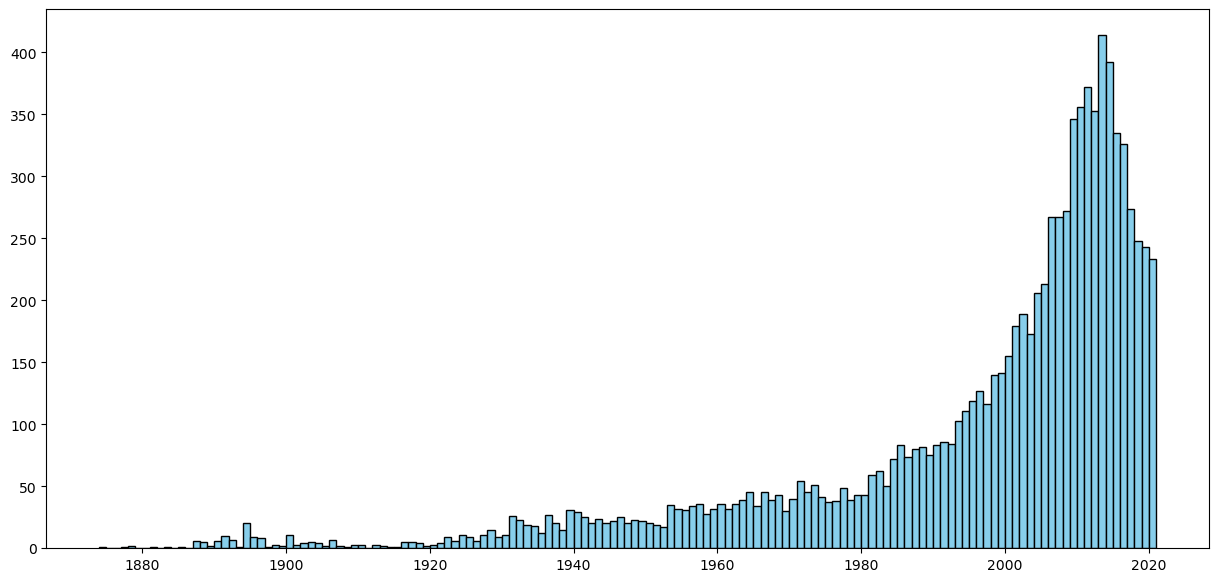

In [95]:
bechdel_df_filtered = bechdel_df.dropna(subset=['year'])

plt.figure(figsize=(15, 7))
plt.hist(bechdel_df['year'], bins=range(int(bechdel_df['year'].min()), int(bechdel_df['year'].max()) + 1), color='skyblue', edgecolor='black')
plt.show()

In [96]:
bechdel_count = bechdel_df.groupby('title')['title'].count()

In [97]:
# count the number of movies with NaN in the Movie name column
movies_df['Movie name'].isna().sum()

0

In [98]:
movie_counts = movies_df.groupby('Movie name')['Movie name'].count()

movie_counts[movie_counts > 1].shape

(4387,)

In [99]:
print(f"We had {movies_df.shape[0]} and we have {movie_counts.shape[0]} unique movie names")
print(f"We had {bechdel_df.shape[0]} and we have {bechdel_count.shape[0]} unique movie names")

We had 81741 and we have 75478 unique movie names
We had 9373 and we have 9139 unique movie names


In [100]:
# Merge the datasets based on the movie title alone, ignoring the release year
# This will include all matches, potentially matching different movies with the same name
merged_on_title = pd.merge(bechdel_df, movies_df, left_on='title', right_on='Movie name', how='inner')

# Display the shape of the new merged dataframe and the first few entries to inspect
merged_on_title.head()


,Unnamed: 0,title,imdbid,id,rating,year,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres Reduced
0,2,Sallie Gardner at a Gallop,2221420.0,9603,0,1878,/m/0b6f62m,Sallie Gardner at a Gallop,NaN,NaN,0.05,[Silent film],[United States of America],"[Silent, Short Film]"
1,13,Roundhay Garden Scene,392728.0,8040,0,1888,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,[Silent film],[United Kingdom],"[Silent, Independent, Short Film, Black and Wh..."
2,18,"Leisurely Pedestrians, Open Topped Buses and H...",466876.0,9619,0,1889,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"[Silent film, English Language]",[United Kingdom],"[Silent, Independent, Short Film, Black and Wh..."
3,19,Hyde Park Corner,2116898.0,9945,0,1889,/m/064kpp3,Hyde Park Corner,1935,NaN,85.00,[],[United Kingdom],"[Thriller, Crime, Drama, Film Adaptation]"
4,20,"Monkeyshines, No. 1",361921.0,9617,0,1890,/m/0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,[Silent film],[United States of America],[Silent]


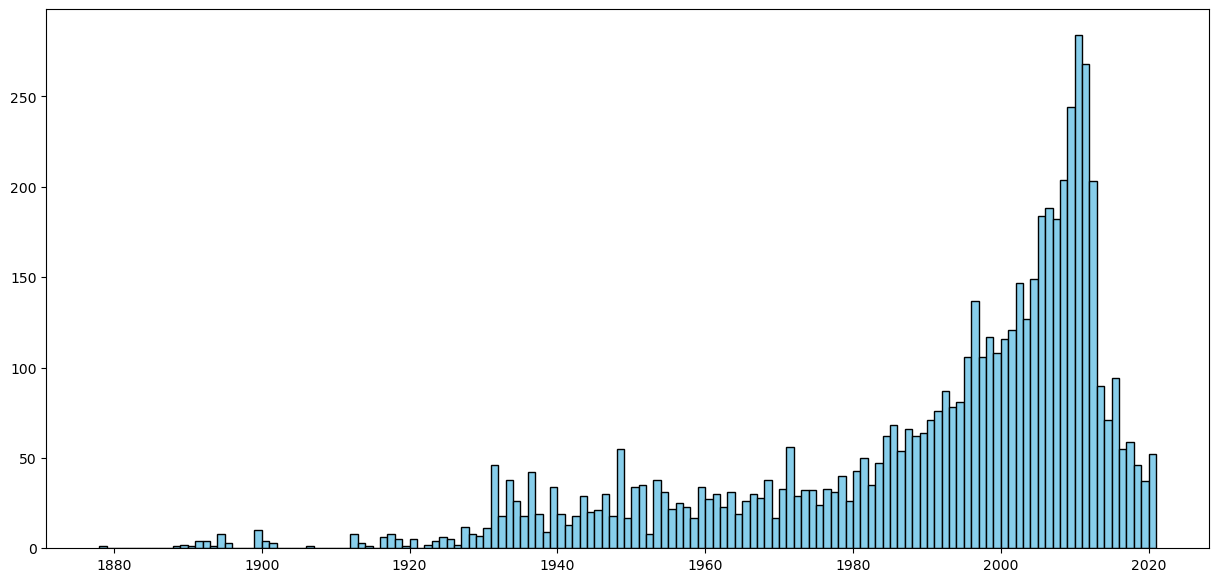

In [101]:
# Plot the number of movies in each year
plt.figure(figsize=(15, 7))
plt.hist(merged_on_title['year'], bins=range(int(merged_on_title['year'].min()), int(merged_on_title['year'].max()) + 1), color='skyblue', edgecolor='black')
plt.show()

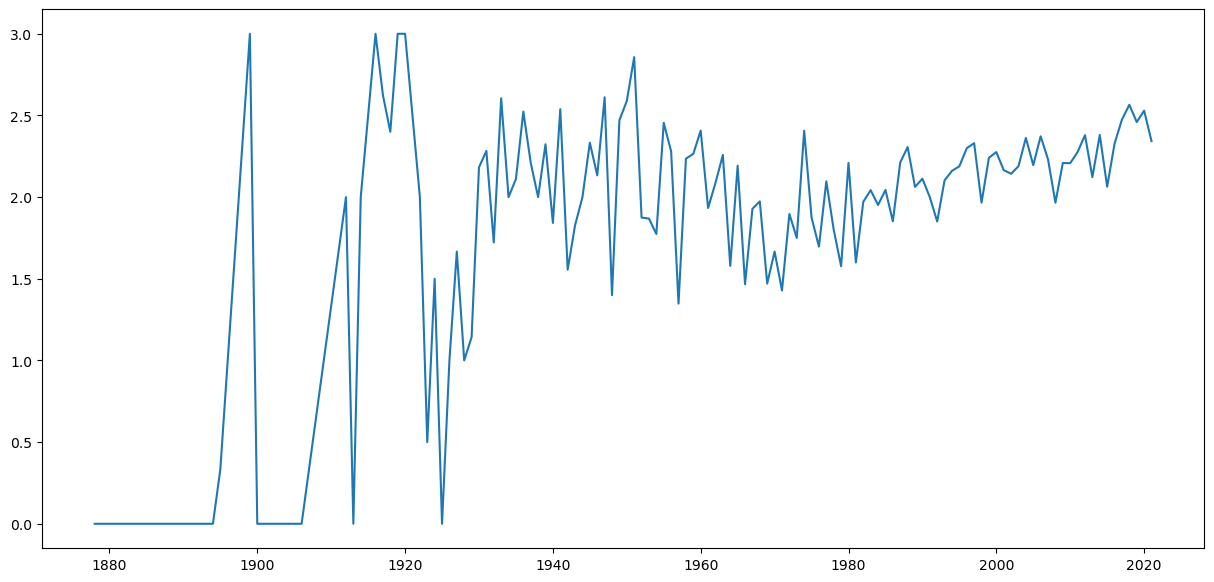

In [102]:
# Plot average Bechdel score by year
plt.figure(figsize=(15, 7))
plt.plot(merged_on_title.groupby('year')['rating'].mean())
plt.show()

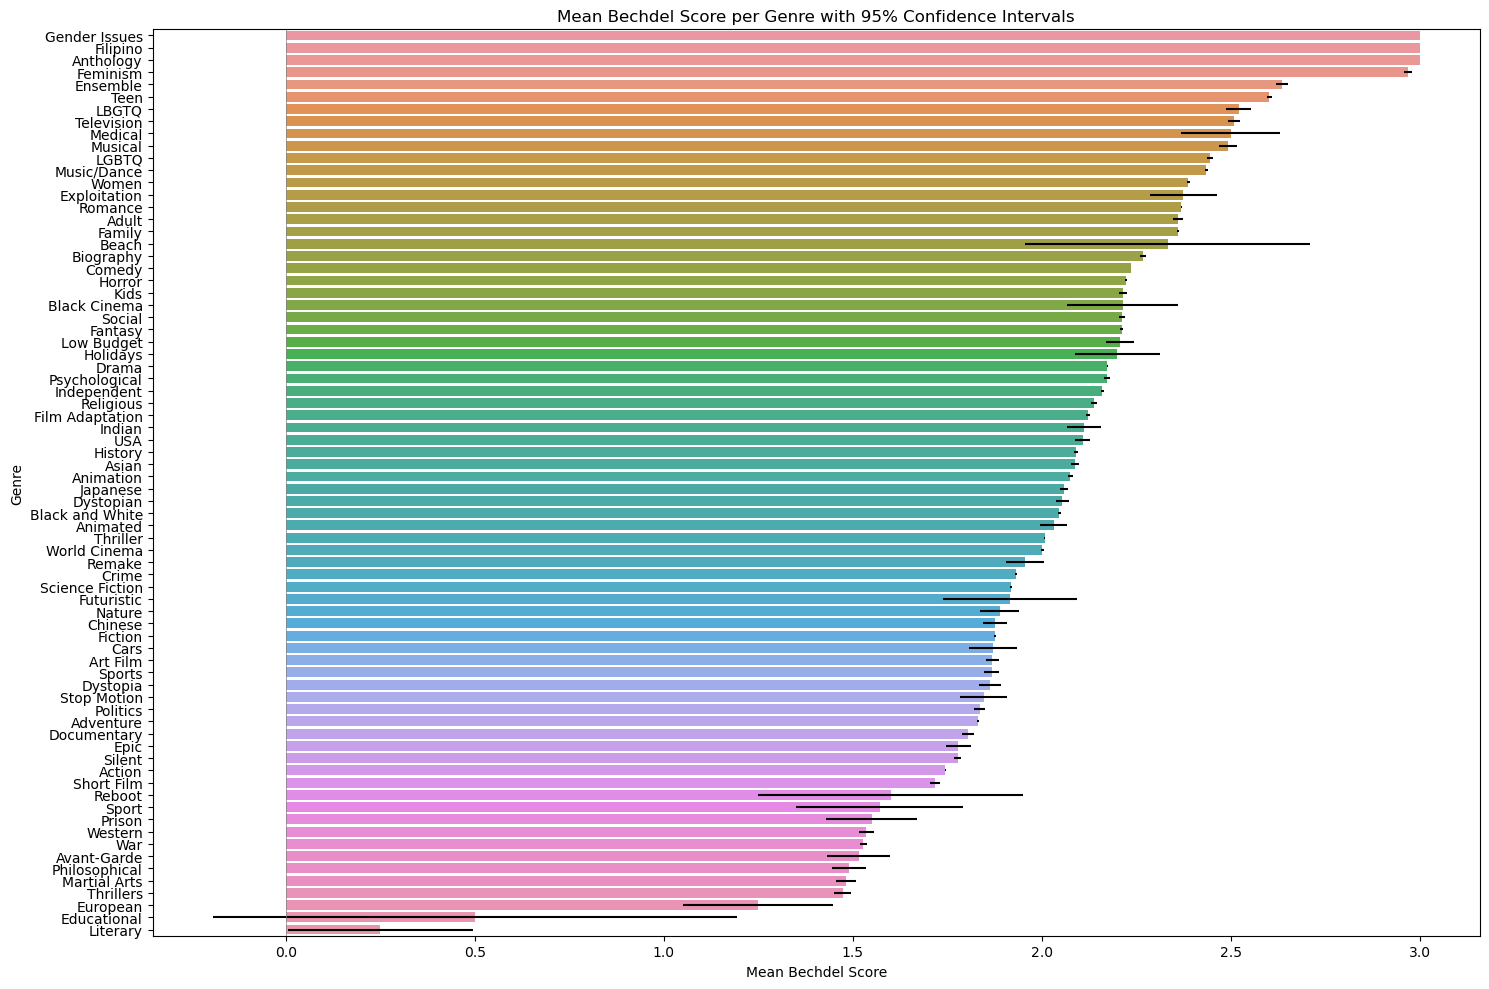

In [103]:
# Explode the 'Genres Reduced' column to have one genre per row
merged_exploded_genres = merged_on_title.explode('Genres Reduced')

# Calculate the mean Bechdel score per genre and the standard error
genre_mean_se = merged_exploded_genres.groupby('Genres Reduced')['rating'].agg(['mean', 'sem', 'count']).reset_index()

# Calculate the 95% confidence interval for the mean Bechdel score per genre
# Assuming the t-distribution since the exact population standard deviation is unknown
ci95_hi = []
ci95_lo = []

for i in genre_mean_se.index:
    m, se, c = genre_mean_se.loc[i, ['mean', 'sem', 'count']]
    ci95_hi.append(m + 1.96*se/np.sqrt(c))
    ci95_lo.append(m - 1.96*se/np.sqrt(c))

genre_mean_se['ci95_hi'] = ci95_hi
genre_mean_se['ci95_lo'] = ci95_lo

# Sort the genres by mean score for better visualization
genre_mean_se_sorted = genre_mean_se.sort_values(by='mean', ascending=False)

# Plotting
plt.figure(figsize=(15,10))
sns.barplot(x='mean', y='Genres Reduced', data=genre_mean_se_sorted, xerr=(genre_mean_se_sorted['ci95_hi'] - genre_mean_se_sorted['mean']))
plt.xlabel('Mean Bechdel Score')
plt.ylabel('Genre')
plt.title('Mean Bechdel Score per Genre with 95% Confidence Intervals')
plt.axvline(x=0, color='grey', lw=0.5)  # Adding a line for reference at mean score of 0
plt.tight_layout()  # Adjust the plot to ensure complete visibility
plt.show()

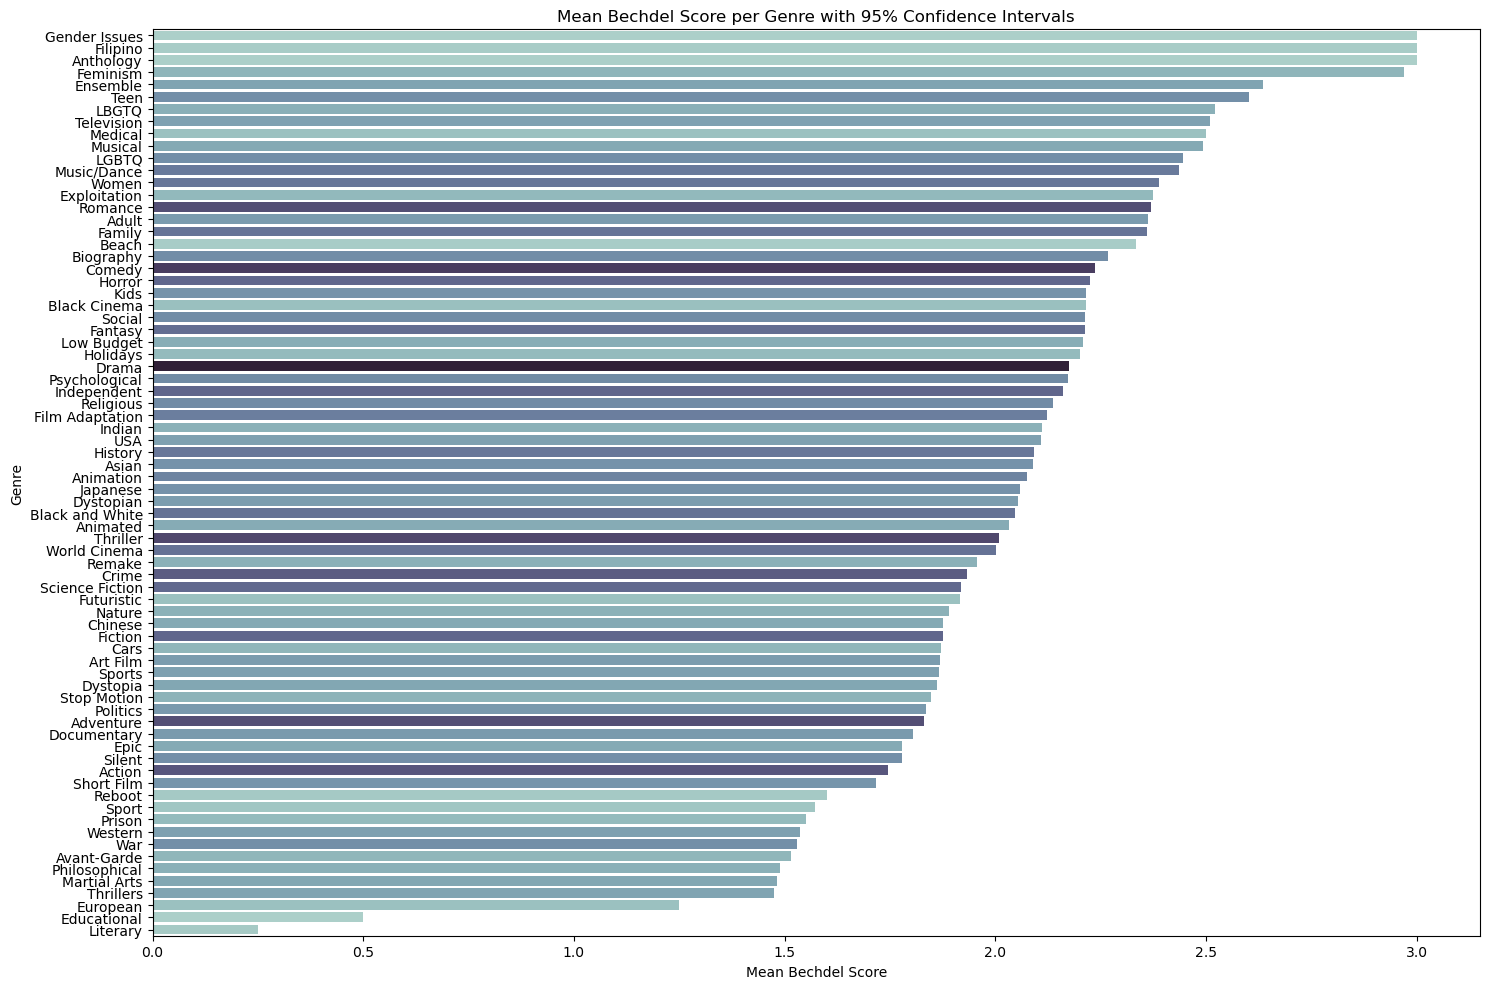

In [104]:
# Define a palette where the number of samples determines the darkness of the color
# The more samples for a genre, the darker the shade of gray
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
max_count = genre_mean_se_sorted['count'].max()
colors = genre_mean_se_sorted['count'].apply(lambda x: (x/max_count)**0.3)  # Exponential scaling for better visual differentiation

# Plotting horizontally
plt.figure(figsize=(15,10))
sns.barplot(x='mean', y='Genres Reduced', data=genre_mean_se_sorted,
            palette=np.array(palette(colors)))

plt.xlabel('Mean Bechdel Score')
plt.ylabel('Genre')
plt.title('Mean Bechdel Score per Genre with 95% Confidence Intervals')
plt.axvline(x=0, color='grey', lw=0.5)  # Adding a line for reference at mean score of 0
plt.tight_layout()  # Adjust the plot to ensure complete visibility
plt.show()

In [105]:
genre_mean_se_sorted_ = genre_mean_se.sort_values(by='count', ascending=False)

for i in range(len(genre_mean_se_sorted_)):
    print(f"{genre_mean_se_sorted_.iloc[i]['Genres Reduced']}: {genre_mean_se_sorted_.iloc[i]['mean']:.2f} +/- {genre_mean_se_sorted_.iloc[i]['sem']:.2f} (n={genre_mean_se_sorted_.iloc[i]['count']})")

Drama: 2.17 +/- 0.02 (n=3251)
Comedy: 2.24 +/- 0.02 (n=1889)
Thriller: 2.01 +/- 0.03 (n=1533)
Romance: 2.37 +/- 0.03 (n=1341)
Adventure: 1.83 +/- 0.03 (n=1330)
Action: 1.75 +/- 0.03 (n=1130)
Crime: 1.93 +/- 0.03 (n=1003)
Fiction: 1.88 +/- 0.04 (n=798)
Independent: 2.16 +/- 0.04 (n=771)
Horror: 2.22 +/- 0.04 (n=763)
Science Fiction: 1.92 +/- 0.04 (n=744)
Fantasy: 2.21 +/- 0.04 (n=624)
World Cinema: 2.00 +/- 0.05 (n=584)
Black and White: 2.05 +/- 0.05 (n=581)
Family: 2.36 +/- 0.04 (n=546)
History: 2.09 +/- 0.05 (n=496)
Women: 2.39 +/- 0.04 (n=495)
Music/Dance: 2.44 +/- 0.04 (n=466)
Film Adaptation: 2.12 +/- 0.05 (n=409)
Animation: 2.08 +/- 0.06 (n=342)
Psychological: 2.17 +/- 0.06 (n=272)
Religious: 2.14 +/- 0.07 (n=269)
Social: 2.21 +/- 0.06 (n=253)
Biography: 2.27 +/- 0.06 (n=247)
Silent: 1.78 +/- 0.08 (n=238)
LGBTQ: 2.45 +/- 0.06 (n=233)
War: 1.53 +/- 0.08 (n=229)
Teen: 2.60 +/- 0.05 (n=226)
Asian: 2.09 +/- 0.08 (n=204)
Japanese: 2.06 +/- 0.08 (n=204)
Kids: 2.22 +/- 0.08 (n=195)
Short